# 

## Download the data



You can download the data from the link [here](https://www.10xgenomics.com/datasets/5k-human-pbmcs-3-v3-1-chromium-controller-3-1-standard)

```
# https://www.10xgenomics.com/datasets/5k-human-pbmcs-3-v3-1-chromium-controller-3-1-standard
wget https://cf.10xgenomics.com/samples/cell-exp/7.0.1/SC3pv3_GEX_Human_PBMC/SC3pv3_GEX_Human_PBMC_fastqs.tar
tar xvf SC3pv3_GEX_Human_PBMC_fastqs.tar
```

For this class, you can find a copy under the path: 


In [1]:
%%bash
ls /scratch/zt1/project/bioi611/shared/raw_data/Chromium_3p_GEX_Human_PBMC_fastqs/

Chromium_3p_GEX_Human_PBMC_S1_L001_I1_001.fastq.gz
Chromium_3p_GEX_Human_PBMC_S1_L001_I2_001.fastq.gz
Chromium_3p_GEX_Human_PBMC_S1_L001_R1_001.fastq.gz
Chromium_3p_GEX_Human_PBMC_S1_L001_R2_001.fastq.gz


### Check R1 and R2



| Read     | Read 1             | i7 Index     | i5 Index     | Read 2 |
|----------|--------------------|--------------|--------------|--------|
| Purpose  | Cell barcode & UMI | Sample Index | Sample Index | Insert |
| Length** | 28                 | 10           | 10           | 90     |



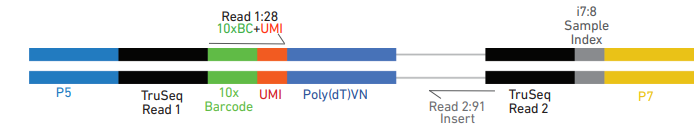

An Unique Molecular Identifier (UMI) is a short sequence tag (usually 8-12 nucleotides long) that is added to each RNA molecule during library preparation. UMIs are critical for accurately quantifying gene expression, as they help to distinguish between unique RNA molecules and technical duplicates that arise from PCR amplification.


How ow UMIs work in the 10x scRNA-seq workflow:

1. Library Preparation: Each RNA molecule is tagged with a UMI as well as cell-specific barcodes. This labeling occurs before PCR amplification, so each original RNA molecule within a single cell is uniquely identifiable.

2. Eliminating Amplification Bias: When the tagged molecules are amplified by PCR, each original molecule (regardless of how many duplicates it creates) retains its unique UMI. Later, when sequencing reads are aligned and counted, duplicate reads with the same UMI and gene alignment are considered as representing a single molecule.

3. Accurate Quantification: Using UMIs allows for a more accurate measure of gene expression by avoiding overcounting due to PCR duplicates, providing a closer representation of the actual RNA molecules present in each cell.


In [4]:
%%bash
zcat /scratch/zt1/project/bioi611/shared/raw_data/Chromium_3p_GEX_Human_PBMC_fastqs/Chromium_3p_GEX_Human_PBMC_S1_L001_R1_001.fastq.gz |head -12

@A00836:523:HJH22DSXY:1:1101:1823:1016 1:N:0:ATGGAGGGAG+AATGGGTTAT
TNATGGACAAACAGGCCGTTGCACTAAA
+
F#FFFFFFFFFFF:FFFFFFFFFFFFFF
@A00836:523:HJH22DSXY:1:1101:1841:1016 1:N:0:ATGGAGGGAG+AATGGGTTAT
TNGTGATGTTCTTGTTCTCACTCGAGGT
+
F#FFFFFFFFFFFFFFFFFFFFFFFFFF
@A00836:523:HJH22DSXY:1:1101:1949:1016 1:N:0:ATGGAGGGAG+AATGGGTTAT
ANACAGGGTCCTACGGTTCATCTTTGTG
+
F#FFFFFFFFFFFFFFFFFFFFFFFFFF


In [5]:
%%bash
zcat /scratch/zt1/project/bioi611/shared/raw_data/Chromium_3p_GEX_Human_PBMC_fastqs/Chromium_3p_GEX_Human_PBMC_S1_L001_R2_001.fastq.gz |head -12

@A00836:523:HJH22DSXY:1:1101:1823:1016 2:N:0:ATGGAGGGAG+AATGGGTTAT
GGCTCACACCTGTAATCCCAGCACTTTGGGAGGCCAAGACAGGTGAACTGCTCGAGGCCGGGAGTTTGAGACCAGCCTGGACAACATGGC
+
FFFF,FFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFFFFFFFFFFFFFFFFF:FFFFFFFFFFFFFFFFFFFF,F,FFF:FFFFFFFFFF
@A00836:523:HJH22DSXY:1:1101:1841:1016 2:N:0:ATGGAGGGAG+AATGGGTTAT
CAGGGCCTGTTGGGGGTTGGGGGCAAGGAGAGGGAGAGCATTAGGACAAATACCTAATGTGTGTGGGGCTTAAAACCTAGATGACGGGTT
+
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFFFFFFFFFFFF
@A00836:523:HJH22DSXY:1:1101:1949:1016 2:N:0:ATGGAGGGAG+AATGGGTTAT
TTTTTTTTGTTCAAATGATTTTAATTATTGGAATGCACAATTTTTTTAATATGCAAATAAAAAGTTTAAAAACCAAAAAAAAAAAAAAGA
+
FFFFFFFFFFFFFFFFF:FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFF,:,:


## Run Cellranger 


Cell Ranger is a software suite developed by 10x Genomics for processing and analyzing data from their single-cell RNA-seq (scRNA-seq), single-cell ATAC-seq (scATAC-seq), and other single-cell assays. Cell Ranger performs tasks such as alignment, filtering, UMI counting, and data aggregation, streamlining the analysis of single-cell datasets generated by 10x Genomics platforms.

Key Functions of `cellranger count`:

* Preprocessing and Alignment: Cell Ranger aligns the reads to a reference genome and uses cell and UMI barcodes to assign each read to a specific cell and RNA molecule. It leverages the STAR aligner for RNA-seq data.

* UMI Counting: Once the reads are aligned, Cell Ranger aggregates UMIs per gene per cell, providing an accurate gene expression count that minimizes PCR amplification bias.

* Gene Expression Quantification: For scRNA-seq data, Cell Ranger creates a gene expression matrix with rows for genes, columns for cells, and values representing UMI counts. This matrix is foundational for downstream analysis, including cell clustering, differential expression, and pathway analysis.

* Cell Clustering and Visualization: Cell Ranger includes tools to cluster cells based on gene expression patterns and create basic visualizations (e.g., t-SNE or UMAP plots) for exploratory data analysis.



In [6]:
%%bash
sbatch /scratch/zt1/project/bioi611/shared/scripts/scRNA_10x_illumina_demo_cellranger.sub

Submitted batch job 8653857


In [7]:
%%bash
cat /scratch/zt1/project/bioi611/shared/scripts/scRNA_10x_illumina_demo_cellranger.sub

#!/bin/bash
#SBATCH --partition=standard
#SBATCH -t 40:00:00
#SBATCH -n 1
#SBATCH -c 26
#SBATCH --mem=250g
#SBATCH --job-name=scRNA_10x_illumina_demo_cellranger
#SBATCH --mail-type=FAIL,BEGIN,END
#SBATCH --error=%x-%J-%u.err
#SBATCH --output=%x-%J-%u.out


## Prepare the input folder 
WORKDIR="/scratch/zt1/project/bioi611/user/$USER/scRNA_10x_illumina_demo/"
REFERENCE="/scratch/zt1/project/bioi611/shared/reference/refdata-gex-GRCh38-2024-A"
FASTQ_DIR=/scratch/zt1/project/bioi611/shared/raw_data/Chromium_3p_GEX_Human_PBMC_fastqs/

mkdir -p $WORKDIR
cd $WORKDIR
export PATH=/scratch/zt1/project/bioi611/shared/software/cellranger-8.0.1/bin:$PATH

cellranger count --id GEX3p_Human_PBMC       \
	         --transcriptome $REFERENCE  \
		 --create-bam true           \
               	 --fastqs $FASTQ_DIR


Input files/folder for `cellranger count`:

1. Raw fastq files

2. Reference 

In this class, the pre-built reference has been downloaded from 10x website: 
https://www.10xgenomics.com/support/software/cell-ranger/downloads


In [8]:
%%bash
ls  /scratch/zt1/project/bioi611/shared/reference/refdata-gex-GRCh38-2024-A
ls  /scratch/zt1/project/bioi611/shared/reference/refdata-gex-GRCh38-2024-A/fasta/
ls  /scratch/zt1/project/bioi611/shared/reference/refdata-gex-GRCh38-2024-A/genes/
ls  /scratch/zt1/project/bioi611/shared/reference/refdata-gex-GRCh38-2024-A/star/
cat /scratch/zt1/project/bioi611/shared/reference/refdata-gex-GRCh38-2024-A/reference.json 

fasta
genes
reference.json
star
genome.fa
genome.fa.fai
genes.gtf.gz
chrLength.txt
chrNameLength.txt
chrName.txt
chrStart.txt
exonGeTrInfo.tab
exonInfo.tab
geneInfo.tab
Genome
genomeParameters.txt
SA
SAindex
sjdbInfo.txt
sjdbList.fromGTF.out.tab
sjdbList.out.tab
transcriptInfo.tab
{
    "fasta_hash": "b6f131840f9f337e7b858c3d1e89d7ce0321b243",
    "genomes": [
        "GRCh38"
    ],
    "gtf_hash.gz": "432db3ab308171ef215fac5dc4ca40096099a4c6",
    "input_fasta_files": [
        "Homo_sapiens.GRCh38.dna.primary_assembly.fa.modified"
    ],
    "input_gtf_files": [
        "gencode.v44.primary_assembly.annotation.gtf.filtered"
    ],
    "mem_gb": 16,
    "mkref_version": "8.0.0",
    "threads": 2,
    "version": "2024-A"
}

### Output folder

The job you submitted will generate an output folder: 


In [12]:
%%bash
ls /scratch/zt1/project/bioi611/user/$USER/scRNA_10x_illumina_demo/GEX3p_Human_PBMC/*

/scratch/zt1/project/bioi611/user/xie186/scRNA_10x_illumina_demo/GEX3p_Human_PBMC/_cmdline
/scratch/zt1/project/bioi611/user/xie186/scRNA_10x_illumina_demo/GEX3p_Human_PBMC/_filelist
/scratch/zt1/project/bioi611/user/xie186/scRNA_10x_illumina_demo/GEX3p_Human_PBMC/_finalstate
/scratch/zt1/project/bioi611/user/xie186/scRNA_10x_illumina_demo/GEX3p_Human_PBMC/GEX3p_Human_PBMC.mri.tgz
/scratch/zt1/project/bioi611/user/xie186/scRNA_10x_illumina_demo/GEX3p_Human_PBMC/_invocation
/scratch/zt1/project/bioi611/user/xie186/scRNA_10x_illumina_demo/GEX3p_Human_PBMC/_jobmode
/scratch/zt1/project/bioi611/user/xie186/scRNA_10x_illumina_demo/GEX3p_Human_PBMC/_log
/scratch/zt1/project/bioi611/user/xie186/scRNA_10x_illumina_demo/GEX3p_Human_PBMC/_mrosource
/scratch/zt1/project/bioi611/user/xie186/scRNA_10x_illumina_demo/GEX3p_Human_PBMC/_perf
/scratch/zt1/project/bioi611/user/xie186/scRNA_10x_illumina_demo/GEX3p_Human_PBMC/_perf._truncated_
/scratch/zt1/project/bioi611/user/xie186/scRNA_10x_illumina_dem

You can also find a copy here:

```
/scratch/zt1/project/bioi611/shared/output/scRNA_10x_illumina_demo
```


The summary file in html format is the first file you will check:

```
/scratch/zt1/project/bioi611/shared/output/scRNA_10x_illumina_demo/outs/web_summary.html
```

A detailed documentation can be found [here](https://www.10xgenomics.com/support/single-cell-gene-expression/documentation/steps/sequencing/interpreting-cell-ranger-web-summary-files-for-single-cell-gene-expression-assays) to help you interpret the summary file. 

If there is any metrics that is not within the expectation, a warning or an error message will be shown on the top of the summary. 

The three files below are usually used as input for downstream analysis. 

In [14]:
%%bash
ls /scratch/zt1/project/bioi611/shared/output/scRNA_10x_illumina_demo/outs/filtered_feature_bc_matrix

barcodes.tsv.gz
features.tsv.gz
matrix.mtx.gz


The folder above contains only detected cell-associated
barcodes. Each element of the matrix is the
number of UMIs associated with a feature
(row) and a barcode (column.

It can be input into third-party packages
and allows users to wrangle the barcodefeature matrix (e.g. to filter outlier cells, run
dimensionality reduction, normalize gene
expression).